# pneumonia prediction using basic algorithms
# model building 

In [3]:
import ipynb

In [4]:
# importing the dataset notebook where the dataframe was created

from ipynb.fs.full.pneumonia_final_dataset import train_data,test_data

<Figure size 432x288 with 0 Axes>

In [5]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
1272,117,84,71,67,63,64,79,92,95,92,...,101,103,102,85,62,39,21,7,0,1
1155,0,0,0,0,0,0,0,0,0,6,...,-57,-71,-91,-101,-123,-124,126,55,5,0
811,16,53,76,91,105,112,113,111,-112,-105,...,51,7,0,0,0,0,0,0,0,0
70,0,0,0,0,3,15,27,37,49,58,...,0,0,0,0,0,0,0,0,0,0
551,27,64,109,101,101,107,106,100,85,54,...,-114,-120,124,122,-118,-123,102,52,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,9,9,9,9,9,10,11,13,14,14,...,62,34,8,3,4,3,2,2,2,0
1259,11,40,67,86,97,99,97,105,-128,-119,...,116,79,50,14,0,0,0,0,0,0
164,80,104,-119,120,105,110,105,108,-126,-125,...,13,3,2,3,4,5,9,4,3,1
399,49,78,98,113,121,127,-125,-116,-94,-99,...,-115,-122,104,46,9,16,20,24,26,0


In [6]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
157,-122,-122,-122,-122,-122,-121,-119,-113,-107,-105,...,-128,75,22,4,4,2,1,0,0,0
17,11,11,13,15,14,11,10,10,11,12,...,-107,126,102,70,33,9,13,18,19,0
279,23,26,27,27,25,23,18,14,12,38,...,29,3,8,11,13,12,14,22,42,1
252,-56,57,28,35,40,46,54,60,59,59,...,14,11,16,18,18,14,107,57,15,1
69,0,2,11,21,23,24,24,23,23,24,...,-78,-101,-125,95,53,21,11,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,86,87,88,90,89,88,85,82,78,76,...,91,87,82,66,42,23,12,2,0,0
58,0,5,23,43,61,80,93,95,97,109,...,68,38,9,2,4,6,8,9,10,0
43,85,-102,91,83,-118,-119,-81,88,58,66,...,61,57,30,5,14,17,18,18,18,1
21,-39,-41,-32,-41,-60,59,4,11,12,12,...,13,14,14,16,16,16,16,16,17,1


In [7]:
# importing the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np 

In [8]:
# using train_test_split splitting the dataset for model building 

X = train_data.drop('target',axis=1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)

**LOGISTIC REGRESSION MODEL**

In [9]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_val_pred = logistic_model.predict(X_val)

In [10]:
print(classification_report(y_val,y_val_pred))
print('\n')
print(confusion_matrix(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       430
           1       0.90      0.89      0.89       463

    accuracy                           0.89       893
   macro avg       0.89      0.89      0.89       893
weighted avg       0.89      0.89      0.89       893



[[382  48]
 [ 51 412]]


In [12]:
X = test_data.drop('target',axis=1)
Y = test_data['target']

In [13]:
# testdata accuracy score on logistic regression model 

test_score = logistic_model.score(X,Y)
test_score

0.8030592734225621

In [14]:
y_test_pred = logistic_model.predict(X)

In [16]:
print(classification_report(Y,y_test_pred))
print('\n')
print(confusion_matrix(Y,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       234
           1       0.77      0.92      0.84       289

    accuracy                           0.80       523
   macro avg       0.82      0.79      0.79       523
weighted avg       0.81      0.80      0.80       523



[[155  79]
 [ 24 265]]


<AxesSubplot:>

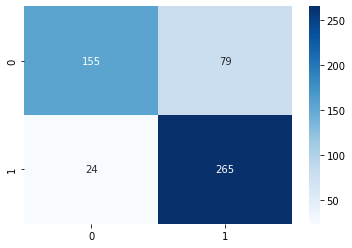

In [17]:
# confusion matrix for the logistic regression model on testdata

sns.heatmap(confusion_matrix(Y,y_test_pred),annot=True,cmap='Blues',fmt ='g')

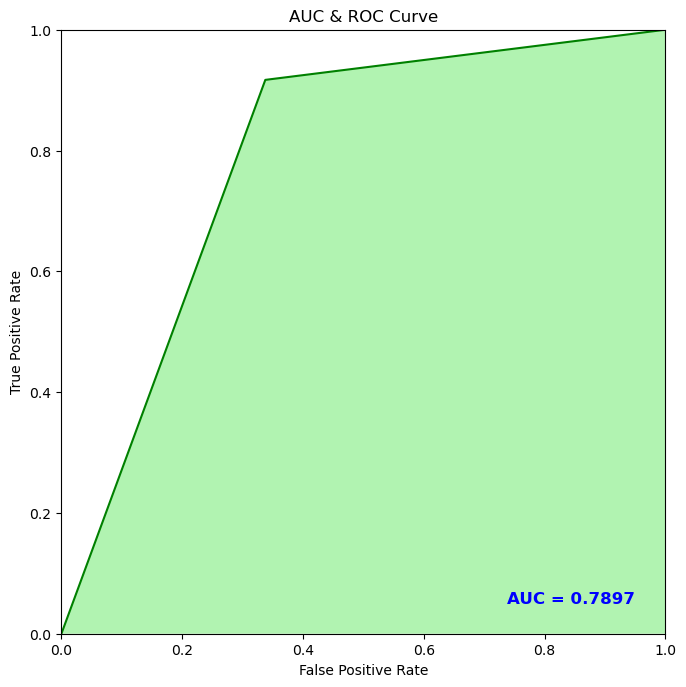

In [20]:
# AUC-ROC curve for logistic regression model on testdata

import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(Y,y_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y,y_test_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**applying cross validation for the logistic regression model on train data**

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88038278 0.88995215 0.8708134  0.86057692 0.87980769 0.88942308
 0.86057692 0.87980769 0.86538462 0.875     ]


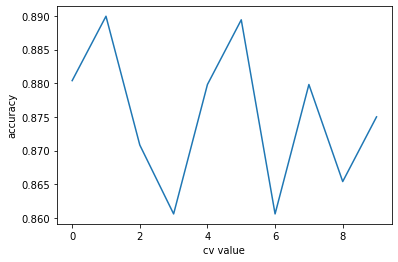

In [22]:
ax = sns.lineplot(data=scores)
ax.set(xlabel='cv value', ylabel='accuracy')
plt.show()

In [23]:
print("Accuracy of Model with Cross Validation is:",scores .mean() * 100)

Accuracy of Model with Cross Validation is: 87.51725248435775


**k-NEAREST NEIGHBOURS MODEL**

In [24]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [25]:
neigh = knn(n_neighbors = 2)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [26]:
# calculating the train accuracy on knn

neigh = knn(n_neighbors = 2)
neigh.fit(X_val,y_val)
neigh.score(X_val,y_val)

0.9328107502799552

In [27]:
# calculating the test accuracy on knn

neigh = knn(n_neighbors = 2)
neigh.fit(X,Y)
neigh.score(X,Y)

0.9063097514340345

In [28]:
ky_test_pred = neigh.predict(X)

In [29]:
print(classification_report(Y,ky_test_pred))
print('\n')
print(confusion_matrix(Y,ky_test_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       234
           1       1.00      0.83      0.91       289

    accuracy                           0.91       523
   macro avg       0.91      0.92      0.91       523
weighted avg       0.92      0.91      0.91       523



[[234   0]
 [ 49 240]]


<AxesSubplot:>

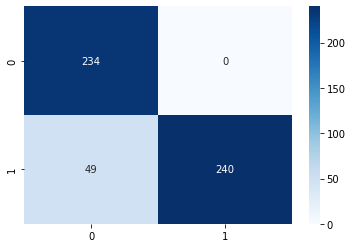

In [30]:
# confusion matrix for the k-nearest neighbours model on testdata

sns.heatmap(confusion_matrix(Y,ky_test_pred),annot=True,cmap='Blues',fmt ='g')

**both logistic regression and knn performed well on bith train as well as test data , but knn produced high accuracy of all**